# Handwritten Digits Classifier

The project is to implement the LeNet Convolutional Neural Networks(CNN) architecture to build a classifier that recognizes the handwritten digits in the [MNIST DATABASE](http://yann.lecun.com/exdb/mnist/).

![LeNet Architecture](https://github.com/dyckia/LeNet-CNN/raw/master/lenet.png)
Image Credit: Yan LeCun

## Load Data

Load the MNIST data, which comes pre-loaded with TensorFlow.

In [1]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", reshape=False)
X_train, y_train           = mnist.train.images, mnist.train.labels
X_validation, y_validation = mnist.validation.images, mnist.validation.labels
X_test, y_test             = mnist.test.images, mnist.test.labels

assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))
assert(len(X_test) == len(y_test))

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz

Image Shape: (28, 28, 1)

Training Set:   55000 samples
Validation Set: 5000 samples
Test Set:       10000 samples


The MNIST data that TensorFlow pre-loads comes as 28x28x1 images.

However, the conventional LeNet architecture only accepts 32x32xC images, where C is the number of color channels.

In order to reformat the MNIST data into a shape that LeNet will accept, I pad the data with two rows of zeros on the top and bottom, and two columns of zeros on the left and right (28+2+2 = 32).

In [2]:
import numpy as np

# Pad images with 0s
X_train      = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_validation = np.pad(X_validation, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test       = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')
    
print("Updated Image Shape: {}".format(X_train[0].shape))

Updated Image Shape: (32, 32, 1)


## Visualize Data

View a sample from the dataset.

4


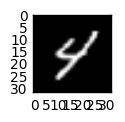

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])

## Preprocess Data

Shuffle the training data.

In [4]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy. 

Here I set the `EPOCH` and `BATCH_SIZE` to be 10 and 128 respectively.

In [5]:
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 128

## Implement LeNet-5
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation Function.** Here I use Rectified Linear Unit (ReLU)

**Max Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation Function.** Here I use Rectified Linear Unit (ReLU)

**Max Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. 

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation Function.** Here I use Rectified Linear Unit (ReLU)

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation Function.** Here I use Rectified Linear Unit (ReLU)

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [6]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Choose layers weights & bias
    weights = {
    'wc1': tf.Variable(tf.truncated_normal([5, 5, 1, 6], stddev =0.3)),
    'wc2': tf.Variable(tf.truncated_normal([5, 5, 6, 16], stddev =0.3)),
    'wf1': tf.Variable(tf.truncated_normal([400, 120], stddev =0.3)),
    'wf2': tf.Variable(tf.truncated_normal([120, 84], stddev =0.3)),
    'out': tf.Variable(tf.truncated_normal([84, 10], stddev =0.3))}

    biases = {
    'bc1': tf.Variable(tf.zeros([6])),
    'bc2': tf.Variable(tf.zeros([16])),
    'bf1': tf.Variable(tf.zeros([120])),
    'bf2': tf.Variable(tf.zeros([84])),
    'out': tf.Variable(tf.zeros([10]))}
    
    # Choose Convolutional strides to be [1, 1, 1, 1].
    conv_strides = [1, 1, 1, 1]
    
    # Choose Pooling kernel size and strides to be [1, 2, 2, 1] and [1, 2, 2, 1] respectively.
    pool_ksize = [1, 2, 2, 1]
    pool_strides = [1, 2, 2, 1]
    
    # Implement LeNet Architecture as described above
    
    conv1 = tf.nn.conv2d(x, weights['wc1'], strides=conv_strides, padding ='VALID') + biases['bc1']
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.max_pool(conv1, ksize=pool_ksize, strides=pool_strides, padding='VALID')

    conv2 = tf.nn.conv2d(conv1, weights['wc2'], strides=conv_strides, padding ='VALID') + biases['bc2']
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.max_pool(conv2, ksize=pool_ksize, strides=pool_strides, padding='VALID')                    

    fc0 = flatten(conv2)
    
    fc1 = tf.matmul(fc0, weights['wf1']) + biases['bf1']
    fc1 = tf.nn.relu(fc1)

    fc2 = tf.matmul(fc1, weights['wf2']) + biases['bf2']
    fc2 = tf.nn.relu(fc2)              

    logits = tf.matmul(fc2, weights['out']) + biases['out']
    
    return logits

## Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

In [7]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 10)

## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

In [8]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

In [9]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

def evaluate_loss(X_data, y_data):
    num_examples = len(X_data)
    total_loss = 0
    sess = tf.get_default_session()
    # divide the data into multiple batchs
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        loss = sess.run(loss_operation, feed_dict={x: batch_x, y: batch_y})
        total_loss += (loss * len(batch_x))
    return total_loss / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

In [10]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    count_train_acc = []
    count_train_loss = []

    count_valid_acc = []
    count_valid_loss = []
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        training_accuracy = evaluate(X_train, y_train)
        count_train_acc.append(training_accuracy)
        training_loss = evaluate_loss(X_train, y_train)
        count_train_loss.append(training_loss)

        validation_accuracy = evaluate(X_validation, y_validation)
        count_valid_acc.append(validation_accuracy)
        validation_loss = evaluate_loss(X_validation, y_validation)
        count_valid_loss.append(validation_loss)
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.904

EPOCH 2 ...
Validation Accuracy = 0.941

EPOCH 3 ...
Validation Accuracy = 0.952

EPOCH 4 ...
Validation Accuracy = 0.960

EPOCH 5 ...
Validation Accuracy = 0.964

EPOCH 6 ...
Validation Accuracy = 0.970

EPOCH 7 ...
Validation Accuracy = 0.971

EPOCH 8 ...
Validation Accuracy = 0.975

EPOCH 9 ...
Validation Accuracy = 0.975

EPOCH 10 ...
Validation Accuracy = 0.979

Model saved


## Plot the Accuracy and Loss Chart

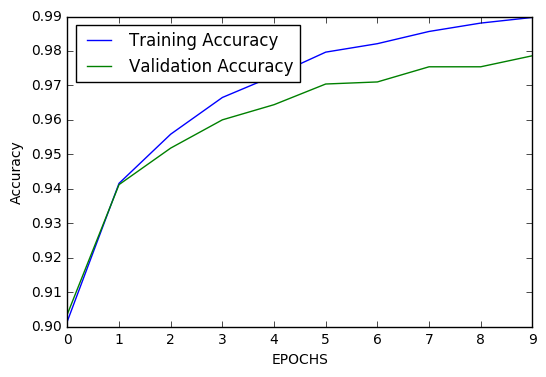

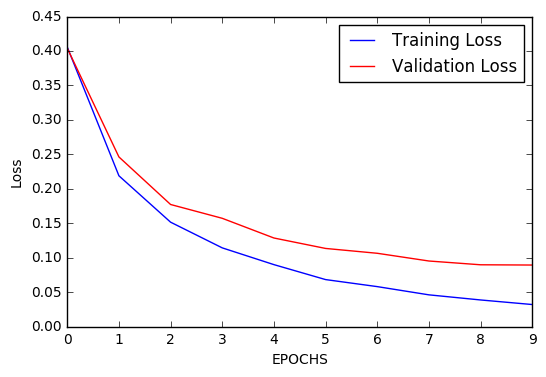

In [11]:
%matplotlib inline
plt.plot(range(EPOCHS),count_train_acc,'b',label ='Training Accuracy')
plt.plot(range(EPOCHS),count_valid_acc,'g',label ='Validation Accuracy')
plt.xlabel('EPOCHS')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

plt.plot(range(EPOCHS),count_train_loss,'b',label ='Training Loss')
plt.plot(range(EPOCHS),count_valid_loss,'r',label ='Validation Loss')
plt.xlabel('EPOCHS')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

## Evaluate the Model on Test Set

In [12]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.976
